<a href="https://colab.research.google.com/github/Ekaterina-Meshkova/BH_HWs/blob/main/HW5_Rgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# 1. Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Для воспроизводимости
RANDOM_STATE = 42

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


In [44]:
# 1 Загрузка данных
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# 2 Создание DataFrame для удобства анализа
dt = pd.DataFrame(X, columns=feature_names)
dt['Target'] = y

# 3 Предварительный анализ данных
print("\nПервые 5 строк данных:")
print(dt.head())

# 4 Проверка на пропущенные значения
print("\nПропущенные значения в данных:")
print(dt.isnull().sum())

# 5 Разделение данных на признаки и целевую переменную
X = dt.drop('Target', axis=1).values
y = dt['Target'].values

# 6 Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7 Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8 Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9 Список моделей
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Linear Regression": LinearRegression(),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "Dummy": DummyRegressor(strategy="mean")  # Базовая модель
}

# 10 Тестирование моделей
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append((name, mae, mse, rmse, r2))

# 11 Вывод результатов
dt_results = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R²"])
print(dt_results)



Первые 5 строк данных:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Пропущенные значения в данных:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Target    0
dtype: int64
                Model        MAE          MSE       RMSE        R²
0       Random Forest  43.609

*** Random Forest ***
MAE: 43.6095
MSE: 2885.5907
RMSE: 53.7177
R²: 0.4554


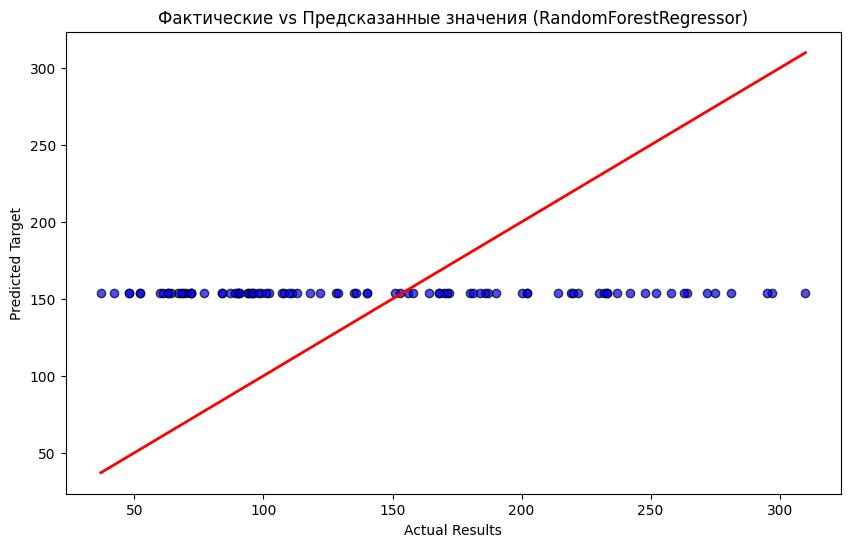

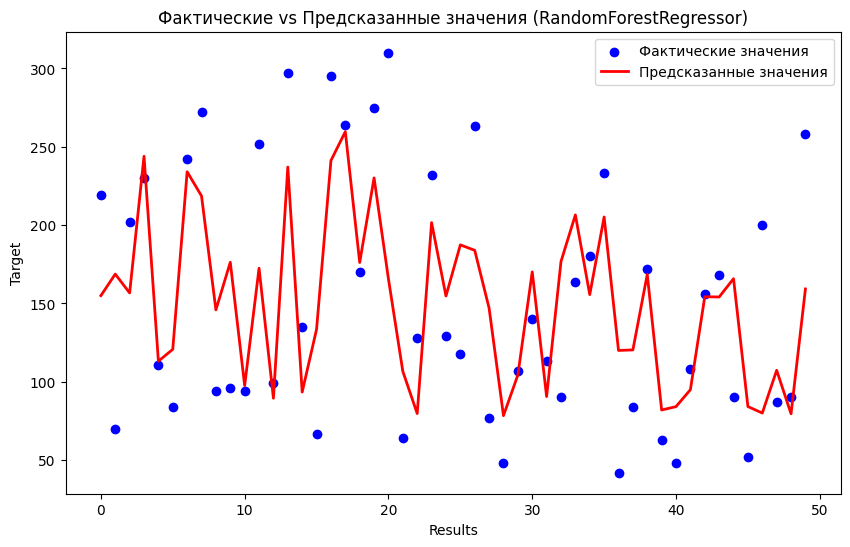

In [41]:
# 1 Визуализация Random Forest Regressor

# 1.1 Обучение Random Forest (100 деревьев)
model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)

# 1.2 Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print(f'*** Random Forest ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# 1.3 График 1 сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue',edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Results")
plt.ylabel("Predicted Target")
plt.title("Фактические vs Предсказанные значения (RandomForestRegressor)")
plt.show()

# 1.4 График 2 сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, color='blue', label='Фактические значения')
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='red', label='Предсказанные значения', linewidth=2)
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (RandomForestRegressor)')
plt.legend()
plt.show()

*** Linear Regression ***
MAE: 64.0065
MSE: 5361.5335
RMSE: 73.2225
R²: -0.0120


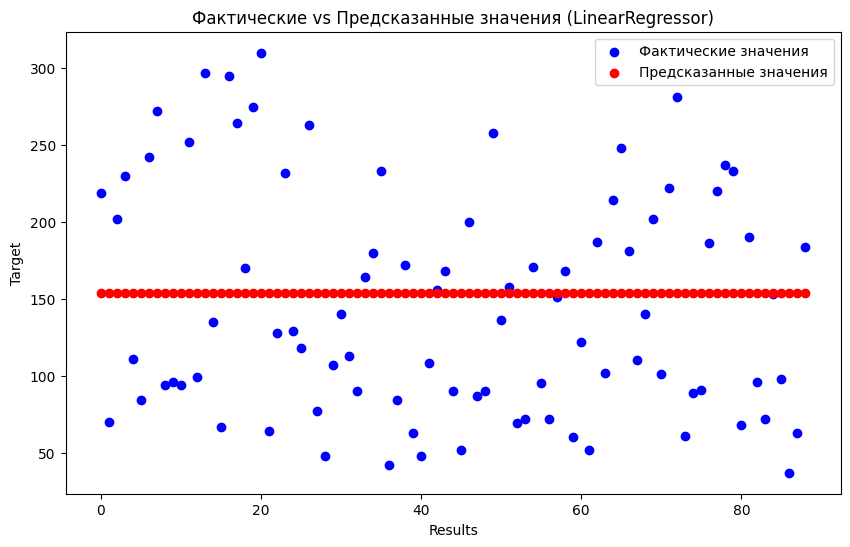

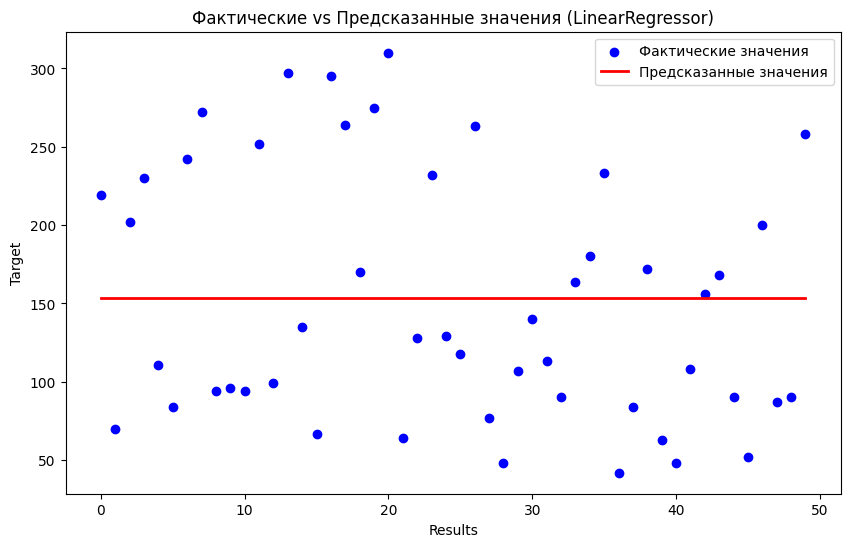

In [37]:
# 2 Визуализация Linear Regression

# 2.1 Обучение линейной регрессии
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)

# 2.2 Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*** Linear Regression ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# 2.3 График 1 сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (LinearRegressor)')
plt.legend()
plt.show()

# 2.4 График 2 сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, color='blue', label='Фактические значения')
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='red', label='Предсказанные значения', linewidth=2)
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (LinearRegressor)')
plt.legend()
plt.show()

*** Elastic Net ***
MAE: 42.8733
MSE: 2866.4613
RMSE: 53.5393
R²: 0.4590


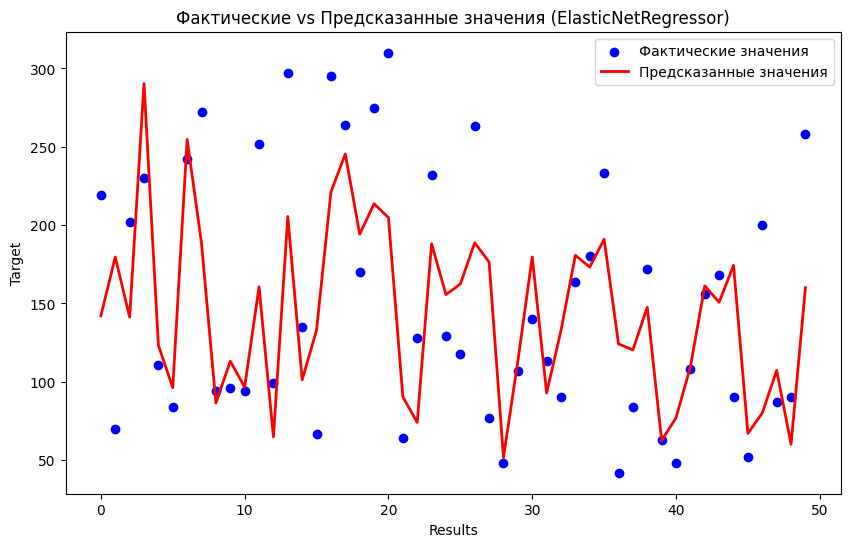

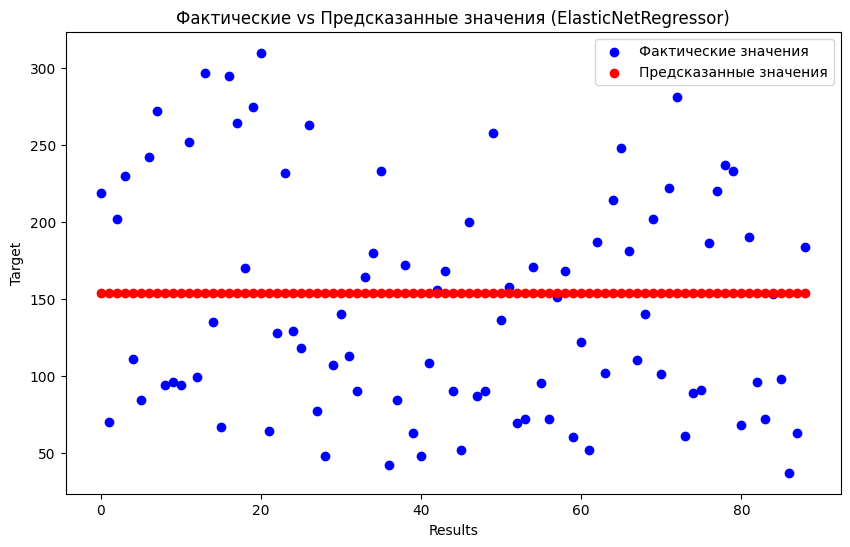

In [40]:
# 3 Визуализация ElasticNet

# 3.1 Обучение Elastic Net
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
model_elastic.fit(X_train_scaled, y_train)
y_pred_elastic = model_elastic.predict(X_test_scaled)

# 3.2 Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_elastic)
mse = mean_squared_error(y_test, y_pred_elastic)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_elastic)

print(f'*** Elastic Net ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# 3.3 График 1 сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, color='blue', label='Фактические значения')
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='red', label='Предсказанные значения', linewidth=2)
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (ElasticNetRegressor)')
plt.legend()
plt.show()

# 3.4 График 2 сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (ElasticNetRegressor)')
plt.legend()
plt.show()

*** Decision Tree Regressor ***
MAE: 64.0065
MSE: 5361.5335
RMSE: 73.2225
R²: -0.0120


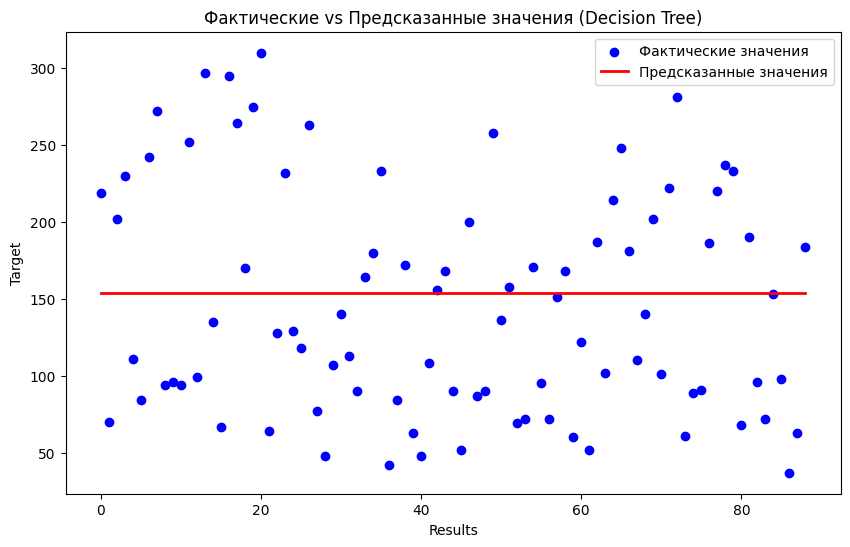

In [46]:
# 4 Визуализация Decision Tree Regressor

# 4.1 Обучение Decision Tree
model_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
model_tree.fit(X_train_scaled, y_train)
y_pred_tree = model_tree.predict(X_test_scaled)

# 4.2 Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*** Decision Tree Regressor ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# 4.3 График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, color='blue', label='Фактические значения')
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='red', label='Предсказанные значения', linewidth=2)
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (Decision Tree)')
plt.legend()
plt.show()

*** Ada Boost Regressor ***
MAE: 53.5665
Mean Squared Error (MSE): 4306.95
R-squared (R^2): 0.41


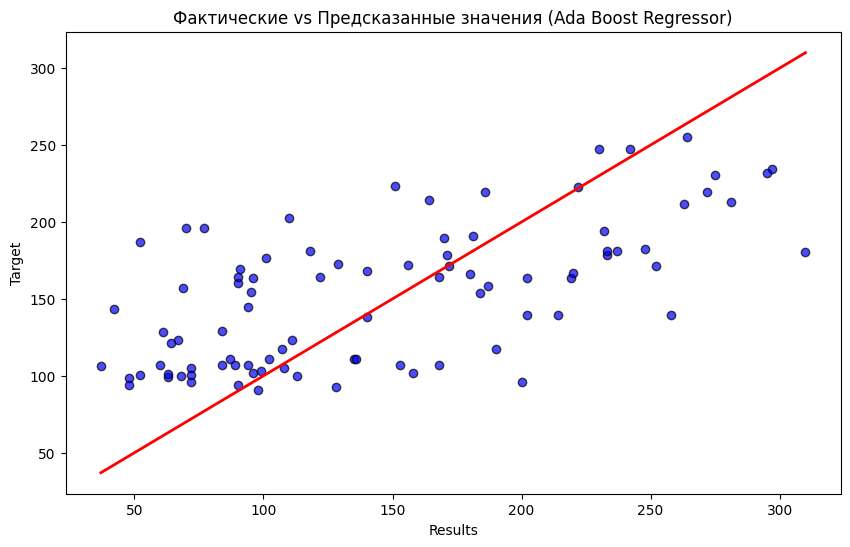

In [73]:
# 5 AdaBoostRegressor регрессор

# 5.1 Создание и обучение модели AdaBoostRegressor
model_ada = AdaBoostRegressor(n_estimators=100, random_state=42)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test_scaled)

# 5.2 Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_ada)
mse = mean_squared_error(y_test, y_pred_ada)
r2 = r2_score(y_test, y_pred)

print(f'*** Ada Boost Regressor ***')
print(f'MAE: {mae:.4f}')
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# 5.3 Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Results')
plt.ylabel('Target')
plt.title("Фактические vs Предсказанные значения (Ada Boost Regressor)")
plt.show()

*** K-Nearest Neighbors ***
MAE: 42.7775
MSE: 3047.4499
RMSE: 55.2037
R²: 0.4248


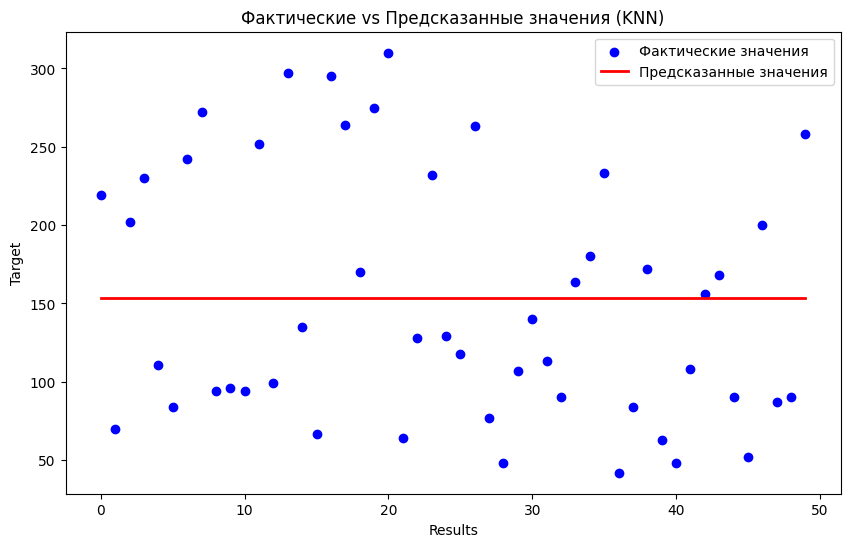

In [59]:
# 6 Визуализация KNeighbors Regressor

# 6.1 Обучение KNN (количество соседей = 5)
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

# 6.2 Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

print(f'*** K-Nearest Neighbors ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# 6.3 График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, color='blue', label='Фактические значения')
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='red', label='Предсказанные значения', linewidth=2)
plt.xlabel('Results')
plt.ylabel('Target')
plt.title("Фактические vs Предсказанные значения (KNN)")
plt.legend()
plt.show()


*** Gradient Boosting ***
MAE: 46.9288
MSE: 3391.4613
RMSE: 58.2363
R²: 0.3599


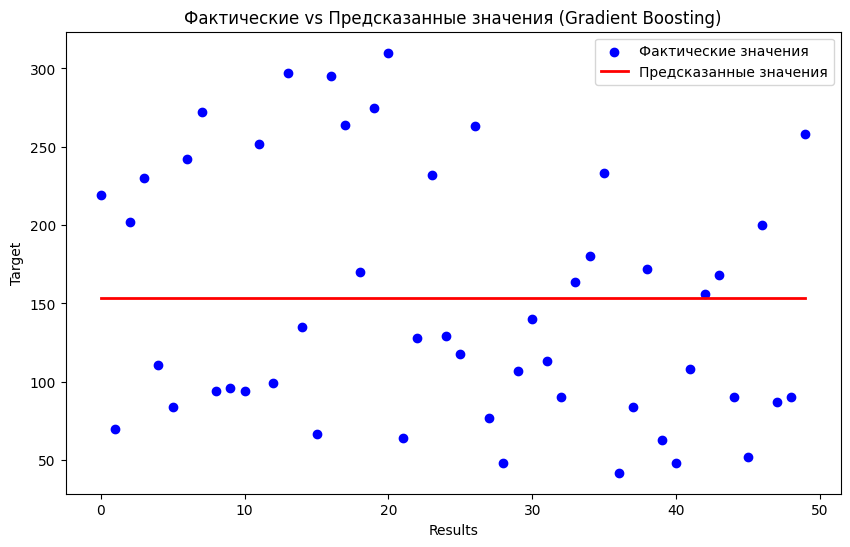

In [57]:
# 7 Визуализация Gradient Boosting Regressor

# 7.1 Обучение Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_gb.fit(X_train_scaled, y_train)
y_pred_gb = model_gb.predict(X_test_scaled)

# 7.2 Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gb)

print(f'*** Gradient Boosting ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# 7.3 График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, color='blue', label='Фактические значения')
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='red', label='Предсказанные значения', linewidth=2)
plt.xlabel('Results')
plt.ylabel('Target')
plt.title("Фактические vs Предсказанные значения (Gradient Boosting)")
plt.legend()
plt.show()

*** Dummy Regressor ***
MAE: 64.0065
MSE: 5361.5335
RMSE: 73.2225
R²: -0.0120


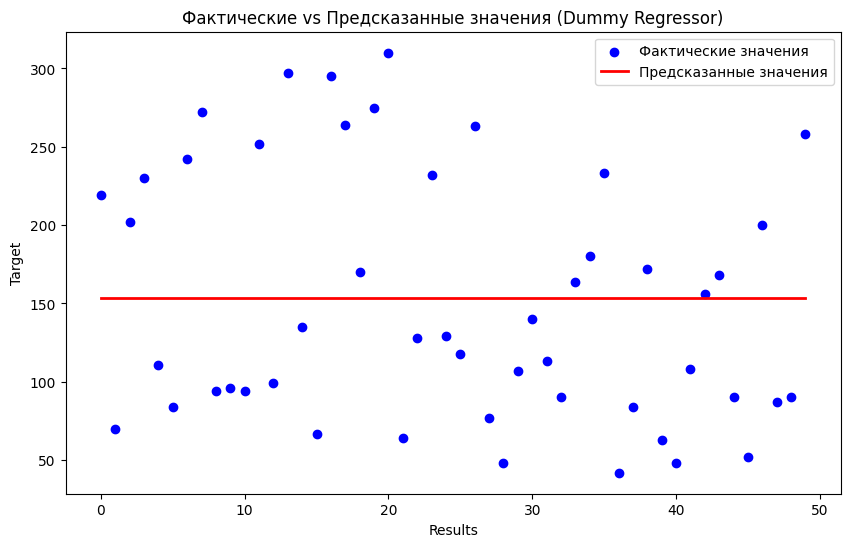

In [61]:
# 8 Визуализация DummyRegressor

# 8.1 Обучение Dummy Regressor (стратегия: среднее значение)
model_dummy = DummyRegressor(strategy="mean")
model_dummy.fit(X_train_scaled, y_train)
y_pred_dummy = model_dummy.predict(X_test_scaled)

# 8.2 Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_dummy)
mse = mean_squared_error(y_test, y_pred_dummy)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dummy)

print(f'*** Dummy Regressor ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# 8.3 График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, color='blue', label='Фактические значения')
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='red', label='Предсказанные значения', linewidth=2)
plt.xlabel('Results')
plt.ylabel('Target')
plt.title("Фактические vs Предсказанные значения (Dummy Regressor)")
plt.legend()
plt.show()

In [75]:

import plotly.graph_objects as go

# Названия моделей и их предсказания
models = {
    "Random Forest": y_pred_rf,
    "Linear Regression": y_pred_linear,  # Предсказание линейной регрессии
    "Elastic Net": y_pred_elastic,
    "Decision Tree": y_pred_tree,
    "AdaBoost": y_pred_ada,
    "KNN": y_pred_knn,
    "Gradient Boosting": y_pred_gb,
    "Dummy": y_pred_dummy
}

# Фактические значения
y_actual = y_test

# Уменьшение размера данных для сравнения
subset_size = 50
y_actual_subset = y_actual[:subset_size]
models_subset = {name: predictions[:subset_size] for name, predictions in models.items()}

# Создание интерактивного графика
fig = go.Figure()

for name, predictions in models_subset.items():
    fig.add_trace(go.Scatter(
        x=list(range(len(y_actual_subset))),
        y=predictions,
        mode='lines',
        name=name
    ))

# Фактические значения
fig.add_trace(go.Scatter(
    x=list(range(len(y_actual_subset))),
    y=y_actual_subset,
    mode='markers',
    name='Actual Values',
    marker=dict(color='black')
))

fig.update_layout(
    title="Сравнение предсказаний разных регрессоров (50 наблюдений)",
    xaxis_title="Results",
    yaxis_title="Target",
    legend_title="Модели"
)

fig.show()


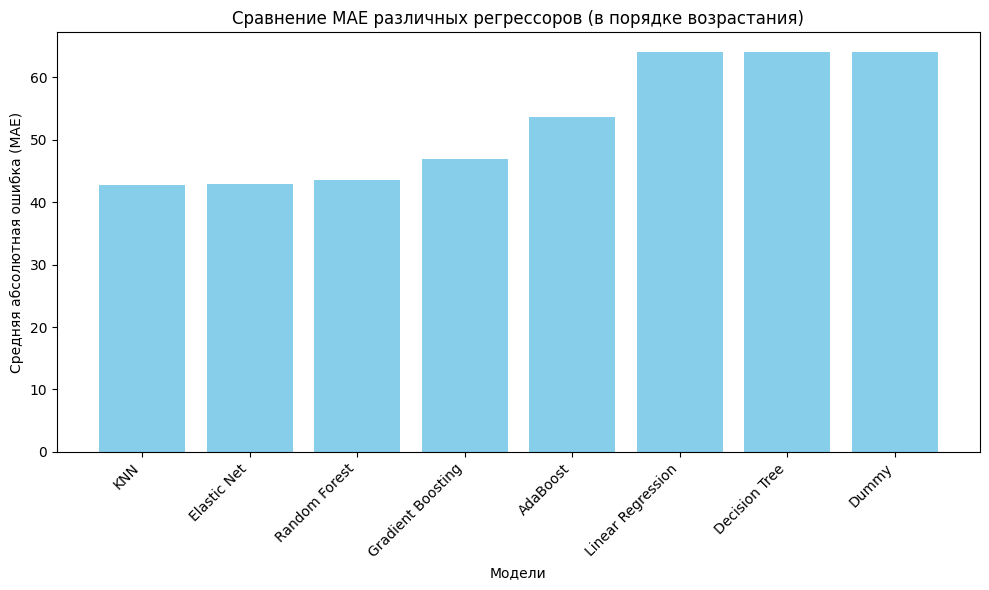

In [74]:
# Сравнение визуализация в виде столбчатой диаграммы для MAE

# Метрики (пример значений MAE для каждой модели)
model_names = ["Random Forest", "Linear Regression", "Elastic Net", "Decision Tree", "AdaBoost", "KNN", "Gradient Boosting", "Dummy"]
mae_values = [43.6095, 64.0065, 42.8733, 64.0065, 53.5665, 42.7775, 46.9288, 64.0065]  # Замените на ваши реальные значения MAE

# Сортировка моделей по возрастанию MAE
sorted_indices = np.argsort(mae_values)
model_names_sorted = [model_names[i] for i in sorted_indices]
mae_values_sorted = [mae_values[i] for i in sorted_indices]

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(model_names_sorted, mae_values_sorted, color='skyblue')
plt.xlabel("Модели")
plt.ylabel("Средняя абсолютная ошибка (MAE)")
plt.title("Сравнение MAE различных регрессоров (в порядке возрастания)")
plt.xticks(rotation=45, ha='right')  # Поворот подписей для удобства чтения
plt.tight_layout()
plt.show()
